# Project London Bike Share  

Data Dictionary: The dataset used for model building contained 17414 observations of 10 variables. The data contains the following information:

| Variable | Description | 
|:---------|:--------:|
|  timestamp   |  timestamp field for grouping the data. |  
|  cnt   |  the count of a new bike shares.  |  
|  t1   |  real temperature in C. |  
|  t2   | temperature in C "feels like".|  
|  hum	| humidity in percentage.   |  
|  windspeed	|  wind speed in km/h.  |  
|  weather_code   |  category of the weather. |  
|  is_holiday   |  1 holiday / 0 non holiday.  |  
|  is_weekend   |  1 if the day is weekend. |  
|  season   | category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.|  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset from an CSV file
bike = pd.read_csv('/Users/faizan/Desktop/london_merged.csv')
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
#Checking the shape of the dataset
bike.shape

(17414, 10)

In [4]:
#Checking columns 
bike.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [5]:
#Checking data types of the columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
#Checking value counts of the column weather_code
bike.weather_code.value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [7]:
#Checking value counts of the column season
bike.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [8]:
#Renaming the columns
new_cols_dict = {
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

bike.rename(new_cols_dict, axis=1, inplace=True)

In [9]:
#Converting humididty into percentage 
bike.humidity_percent=bike.humidity_percent/100

In [10]:
#Renaming the seasons
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}
bike.season = bike.season.astype('str')
bike.season = bike.season.map(season_dict)

In [11]:
#Renaming the weather
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}
bike.weather = bike.weather.astype('str')
bike.weather = bike.weather.map(weather_dict)

In [12]:
# Convert 'season' and 'weather' to categorical
bike['season'] = bike['season'].astype('category')
bike['weather'] = bike['weather'].astype('category')

In [13]:
# Format 'time'
bike['time'] = pd.to_datetime(bike['time'])

In [14]:
# Extract data from the column time 
bike['year'] = bike['time'].dt.year
bike['month'] = bike['time'].dt.month
bike['dayofweek'] = bike['time'].dt.dayofweek
bike['hour'] = bike['time'].dt.hour

In [15]:
bike.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter,2015,1,6,4


In [37]:
bike.describe()

,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,is_holiday,is_weekend,year,month,dayofweek,hour
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.00000,17414.000000
mean,1143.101642,12.468091,11.520836,0.723250,15.913063,0.022051,0.285403,2015.507810,6.514643,2.99265,11.513265
std,1085.108068,5.571818,6.615145,0.143132,7.894570,0.146854,0.451619,0.508157,3.452509,2.00406,6.915893
min,0.000000,-1.500000,-6.000000,0.205000,0.000000,0.000000,0.000000,2015.000000,1.000000,0.00000,0.000000
25%,257.000000,8.000000,6.000000,0.630000,10.000000,0.000000,0.000000,2015.000000,4.000000,1.00000,6.000000
50%,844.000000,12.500000,12.500000,0.745000,15.000000,0.000000,0.000000,2016.000000,7.000000,3.00000,12.000000
75%,1671.750000,16.000000,16.000000,0.830000,20.500000,0.000000,1.000000,2016.000000,10.000000,5.00000,18.000000
max,7860.000000,34.000000,34.000000,1.000000,56.500000,1.000000,1.000000,2017.000000,12.000000,6.00000,23.000000


In [17]:
#Correlation 
bike.corr()

,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,is_holiday,is_weekend,year,month,dayofweek,hour
count,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.051698,-0.096499,0.010046,0.063757,-0.068688,0.324423
temp_real_C,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.042233,-0.005342,-0.037959,0.332712,-0.002317,0.168708
temp_feels_like_C,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.040051,-0.008510,-0.044972,0.368366,-0.006824,0.153956
humidity_percent,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.032068,0.028098,0.072443,0.113149,0.011556,-0.295653
wind_speed_kph,0.116295,0.145471,0.088409,-0.287789,1.000000,-0.002606,0.011479,-0.094739,-0.086383,0.001708,0.141792
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,1.000000,-0.094898,0.034631,-0.011511,-0.144628,-0.000288
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,-0.094898,1.000000,0.003049,-0.005406,0.791975,0.001803
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,0.034631,0.003049,1.000000,-0.026547,-0.002876,0.000542
month,0.063757,0.332712,0.368366,0.113149,-0.086383,-0.011511,-0.005406,-0.026547,1.000000,-0.001080,-0.000312
dayofweek,-0.068688,-0.002317,-0.006824,0.011556,0.001708,-0.144628,0.791975,-0.002876,-0.001080,1.000000,0.001834


A correlation of 1 indicates a perfect positive correlation, meaning as one variable increases, the other variable also increases proportionally.
A correlation of -1 indicates a perfect negative correlation, meaning as one variable increases, the other variable decreases proportionally.
A correlation of 0 indicates no correlation between the two variables.

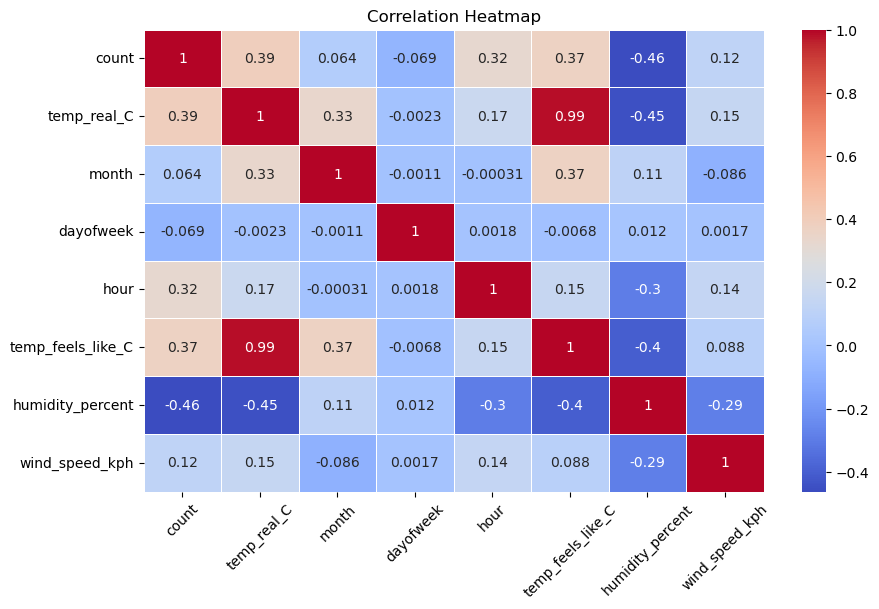

In [57]:
#Correlation Heatmap
corr_matrix = bike[['count', 'temp_real_C', 'month', 'dayofweek', 'hour', 'temp_feels_like_C', 'humidity_percent', 'wind_speed_kph']].corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = .5)
plt.title('Correlation Heatmap')
plt.xticks(rotation = 45)
plt.show()

The strongest positive correlation appears to be between temp_real_C and temp_feels_like_C (0.99), indicating that these two variables are highly positively correlated, which is expected since they both relate to temperature.
There is a moderate positive correlation between temp_real_C and count (0.389), indicating that higher temperatures are associated with more bike shares.
There is a moderate negative correlation between humidity_percent and count (-0.463), indicating that higher humidity is associated with fewer bike shares.
There is a weak positive correlation between month and count(0.063757) suggests a slight tendency for bike shares to increase with higher month numbers.
There is a weak negative correlation between days of the week and count(-0.068688) indicates a slight tendency for bike shares to decrease on later days of the week. 
There is a weak positive correlation between hour and count (0.32), indicating that certain hours of the day are associated with higher bike shares counts.
There is a weak positive correlation between wind speed and count (0.116295), indicating that a slight tendency for bike shares to increase with higher wind speeds.

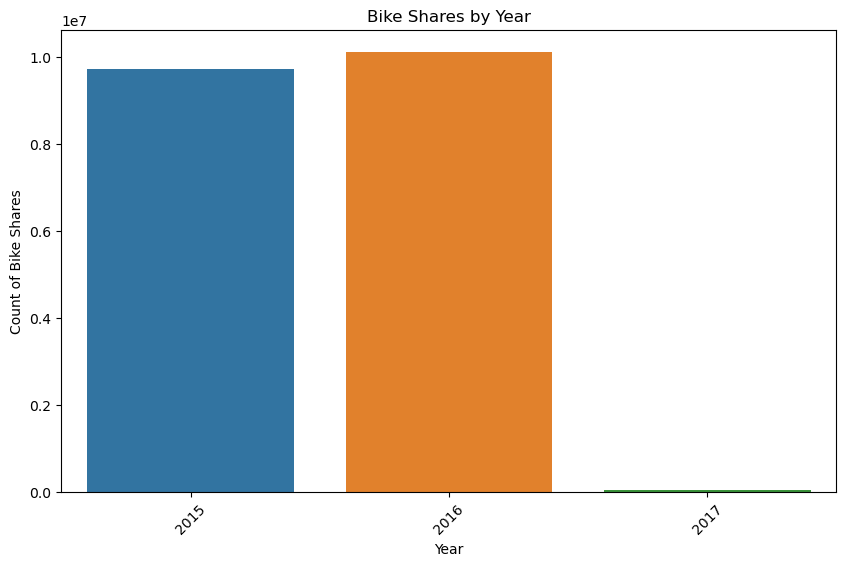

In [67]:
#Bike Shares by Year
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='count', data=bike, estimator=sum, ci=None)
plt.title('Bike Shares by Year')
plt.xlabel('Year')
plt.ylabel('Count of Bike Shares')
plt.xticks(rotation=45)
plt.show()

Bike rental increase slightly from year 2015-2016 but shows a sharp decline in 2017. this is not a good marker as we dont have a complete data for 2017.

/Users/faizan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


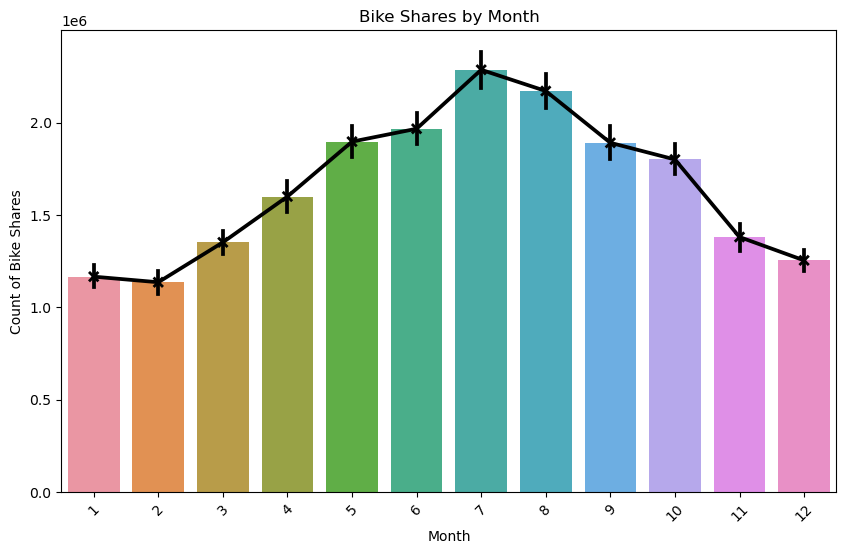

In [68]:
#Bike Shares by Month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='count', data=bike, estimator=sum, ci=None)
sns.pointplot(x='month', y='count', data=bike, color='black', markers='x', linestyles='-', estimator=sum, dodge=True)
plt.title('Bike Shares by Month')
plt.xlabel('Month')
plt.ylabel('Count of Bike Shares')
plt.xticks(rotation=45)
plt.show()

As expected Bike share tends to increase in summer.

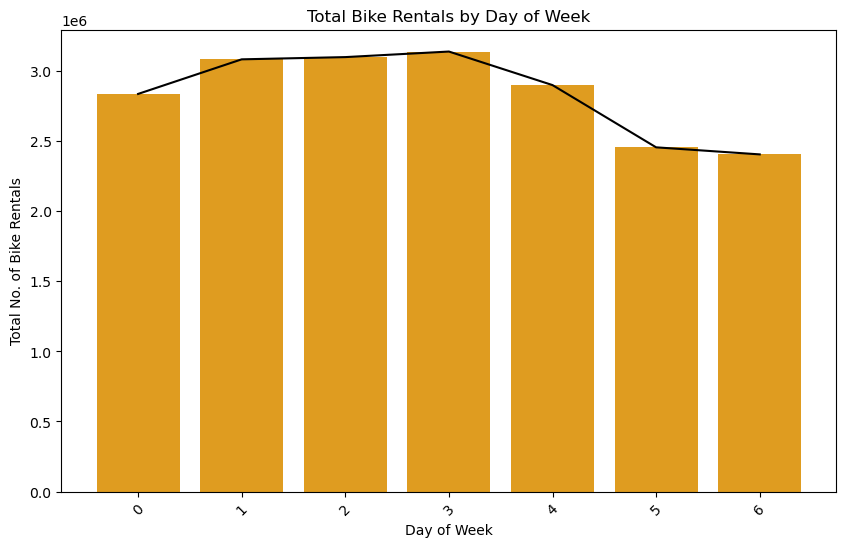

In [54]:
#Bike Shares by Week
plt.figure(figsize=(10, 6))
sns.barplot(x='dayofweek', y='count', data=bike, estimator=sum, ci=None, color='orange')
sns.lineplot(x='dayofweek', y='count', data=bike, estimator=sum, ci=None, color='black')
plt.title('Total Bike Rentals by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total No. of Bike Rentals')
plt.xticks(rotation=45)
plt.show()

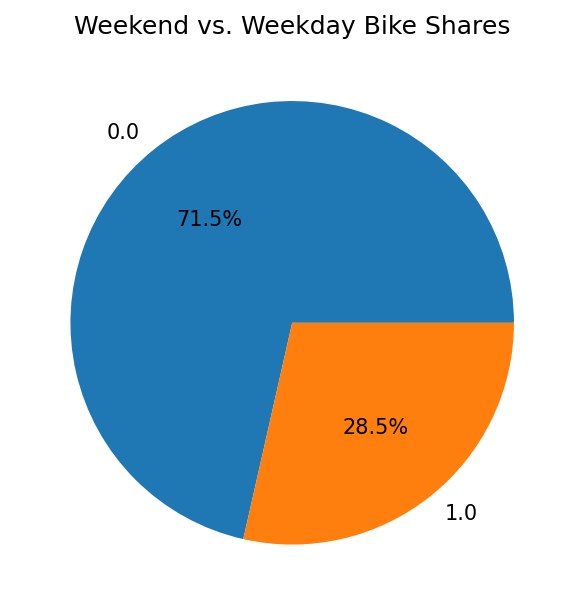

In [69]:
#Weekend and weekday
plt.figure(dpi=150)
bike.is_weekend.value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.ylabel("")
plt.title("Weekend vs. Weekday Bike Shares")
plt.show()

The two graph indicate that bike share tend to increase on a weekday and drop on the weekends.

/Users/faizan/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


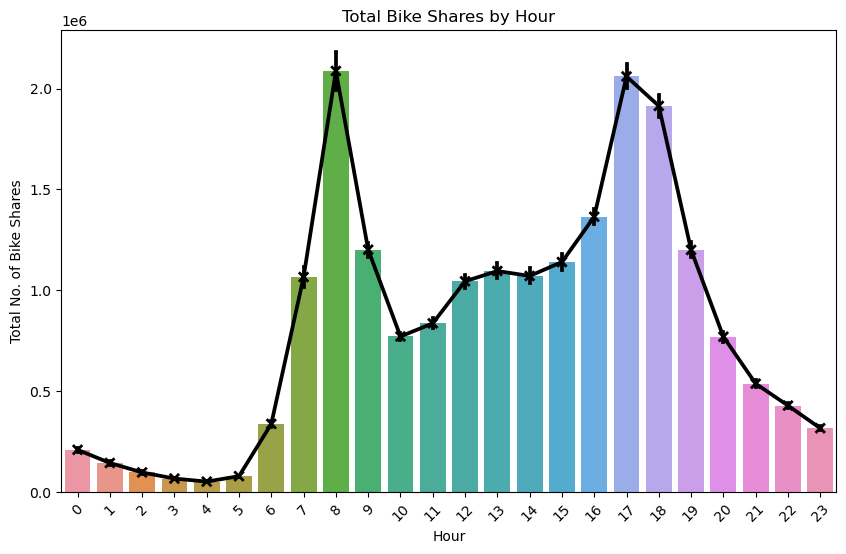

In [70]:
#Bike Shares by Hour
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='count', data=bike, estimator=sum, ci=None)
sns.pointplot(x='hour', y='count', data=bike, color='black', markers='x', linestyles='-', estimator=sum)
plt.title('Total Bike Shares by Hour')
plt.xlabel('Hour')
plt.ylabel('Total No. of Bike Shares')
plt.xticks(rotation=45)
plt.show()

Bike shares tends to increase during rush hour (7AM and 5PM). This indicates that people use bikes when going to work. 

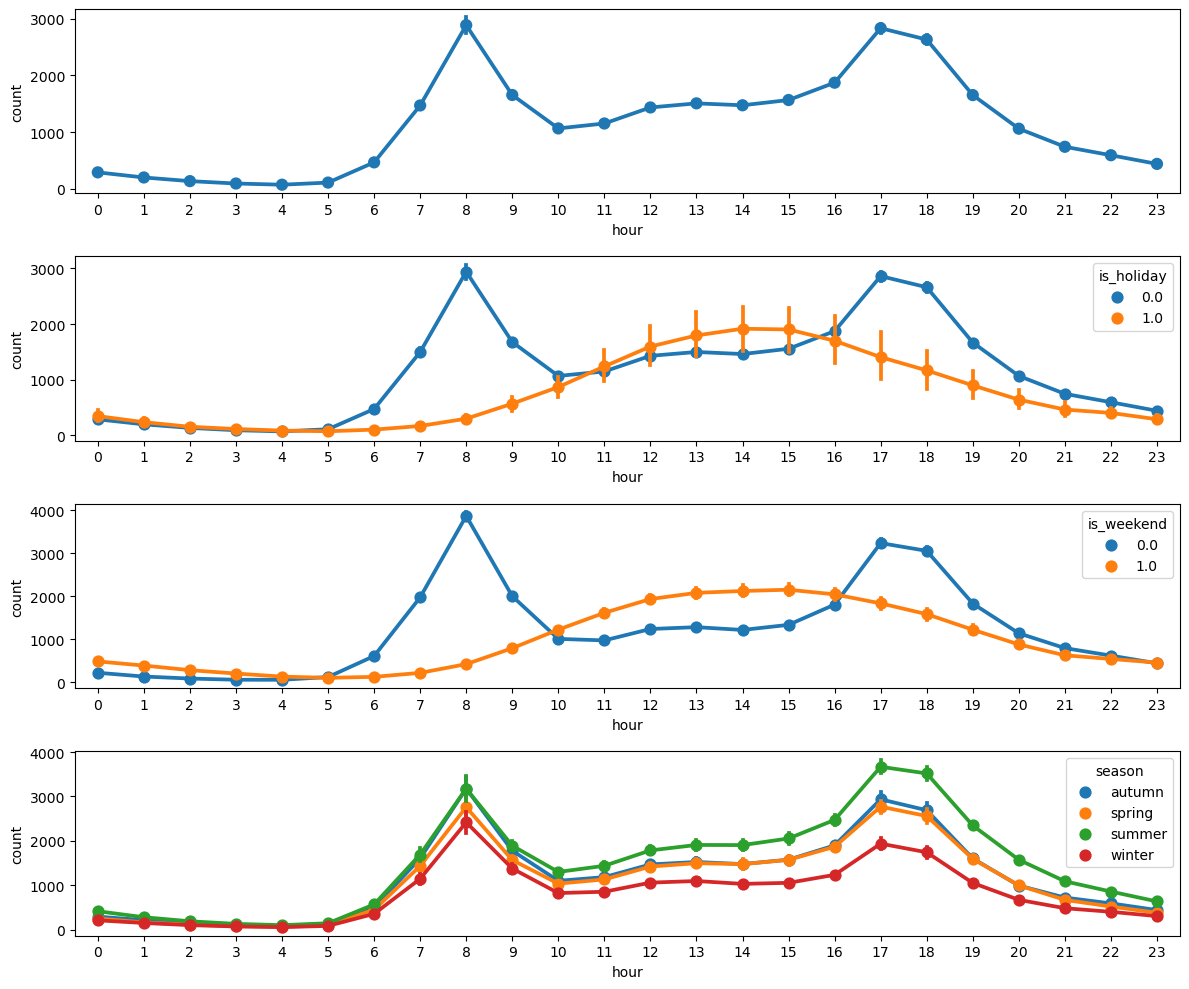

In [65]:
#Set of plots using hour
fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(12,10), dpi=100)
sns.pointplot(data=bike, x="hour", y="count", ax=axs[0])
sns.pointplot(data=bike, x="hour", y="count", ax=axs[1], hue="is_holiday")
sns.pointplot(data=bike, x="hour", y="count", ax=axs[2], hue="is_weekend")
sns.pointplot(data=bike, x="hour", y="count", ax=axs[3], hue="season")
plt.tight_layout()

People use bike in weekdays (during rush hour) more than weekends. Graphs also indicate that the during weekend and holidays bike share increase a little during 12 to 5 pm.

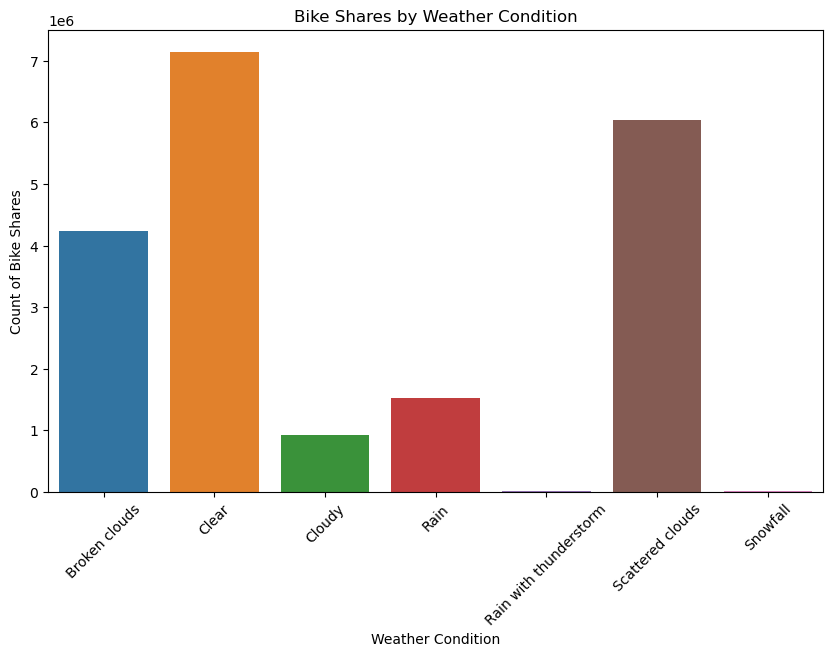

In [71]:
#Bike Shares by Weather conditions
plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='count', data=bike, estimator=sum, ci=None)
plt.title('Bike Shares by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Bike Shares')
plt.xticks(rotation=45)
plt.show()

The graph indicates that bike share is the highest on a clear day followed by broken clouds or scattered cloudy days.Basically bike share increase in good weather.

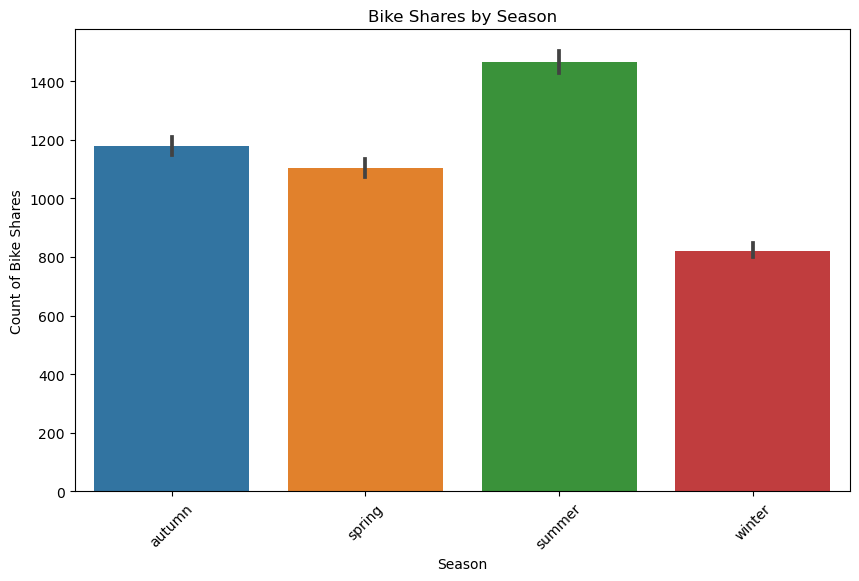

In [72]:
#Bike Shares by Season
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', data=bike)
plt.title('Bike Shares by Season')
plt.xlabel('Season')
plt.ylabel('Count of Bike Shares')
plt.xticks(rotation = 45)
plt.show()

Bike share increases during summer and decreases during winter.

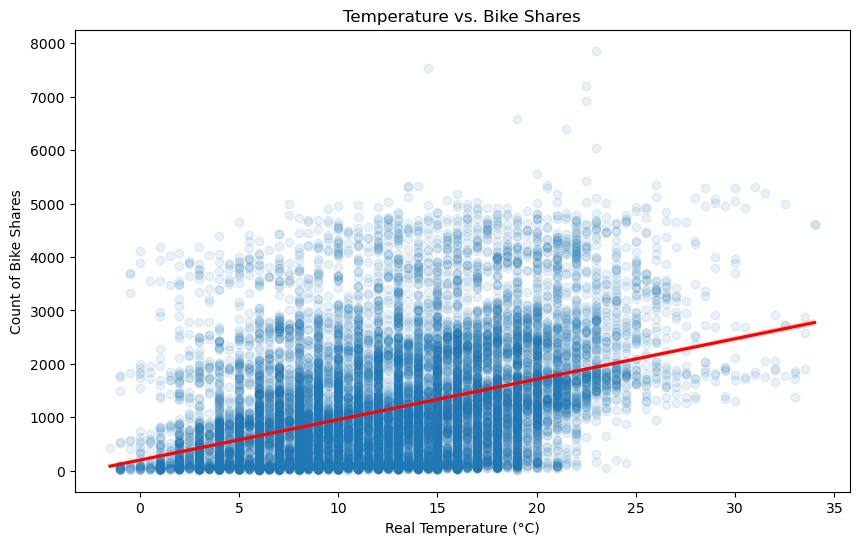

In [73]:
#Temperature vs. No of Bike Shares
plt.figure(figsize = (10, 6))
sns.regplot(x = 'temp_real_C', y = 'count', data = bike, scatter_kws = {'alpha':0.1}, line_kws = {'color': 'red'})
plt.title('Temperature vs. Bike Shares')
plt.xlabel('Real Temperature (°C)')
plt.ylabel('Count of Bike Shares')
plt.show()

Bike share increases as the temperature increases and it becomes more comfortable riding a bike.

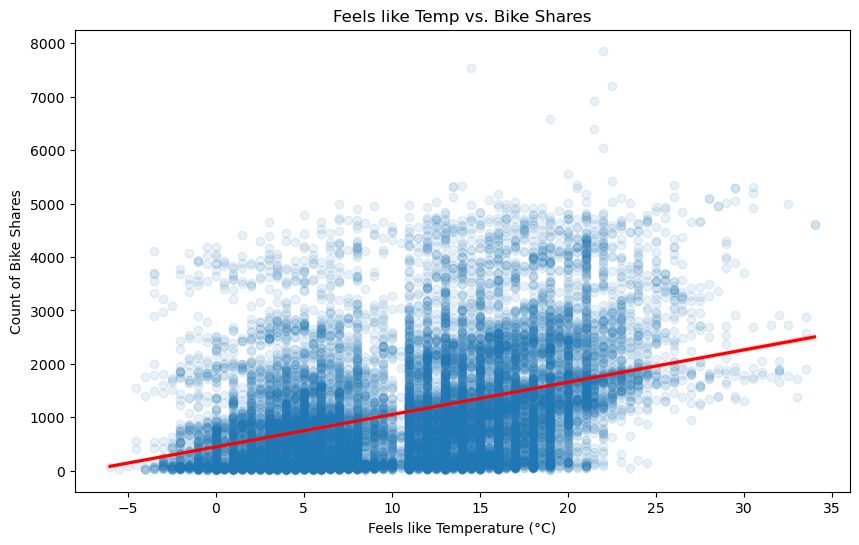

In [74]:
#Feels like Temp vs. No of Bike Shares
plt.figure(figsize = (10, 6))
sns.regplot(x = 'temp_feels_like_C', y = 'count', data = bike, scatter_kws = {'alpha':0.1}, line_kws = {'color': 'red'})
plt.title('Feels like Temp vs. Bike Shares')
plt.xlabel('Feels like Temperature (°C)')
plt.ylabel('Count of Bike Shares')
plt.show()

Bike share increases as the temperature increases and it becomes more comfortable riding a bike.

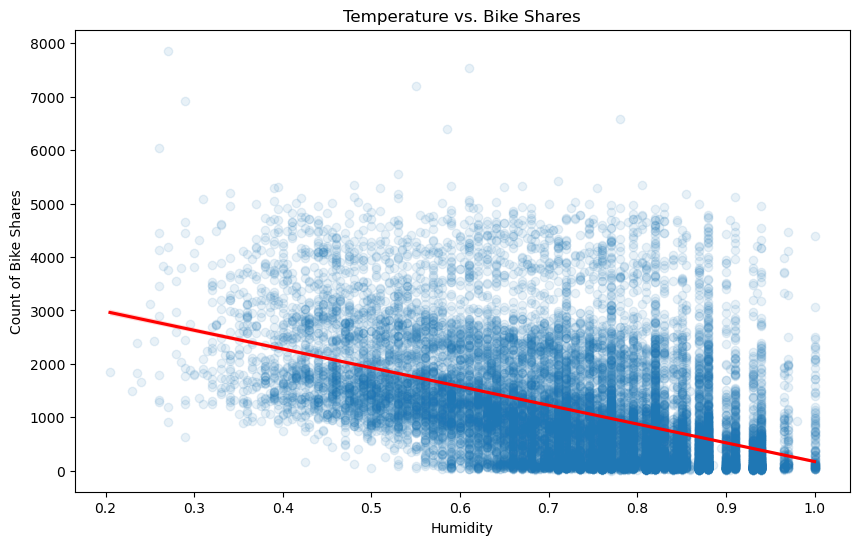

In [75]:
#Humidity vs. No of Bike Shares
plt.figure(figsize = (10, 6))
sns.regplot(x = 'humidity_percent', y = 'count', data = bike, scatter_kws = {'alpha':0.1}, line_kws = {'color': 'red'})
plt.title('Temperature vs. Bike Shares')
plt.xlabel('Humidity')
plt.ylabel('Count of Bike Shares')
plt.show()

Bike share decreases as the humidity increases and it becomes more uncomfortable riding a bike.

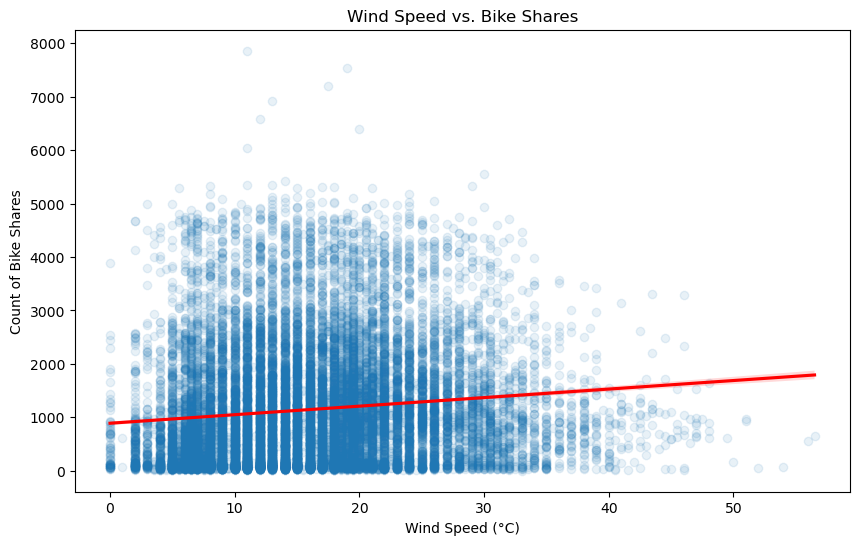

In [76]:
#Plot of Wind Speed vs. No of Bike Shares
plt.figure(figsize = (10, 6))
sns.regplot(x = 'wind_speed_kph', y = 'count', data = bike, scatter_kws = {'alpha':0.1}, line_kws = {'color': 'red'})
plt.title('Wind Speed vs. Bike Shares')
plt.xlabel('Wind Speed (°C)')
plt.ylabel('Count of Bike Shares')
plt.show()

Bike share increases a little as the windspeed increases.

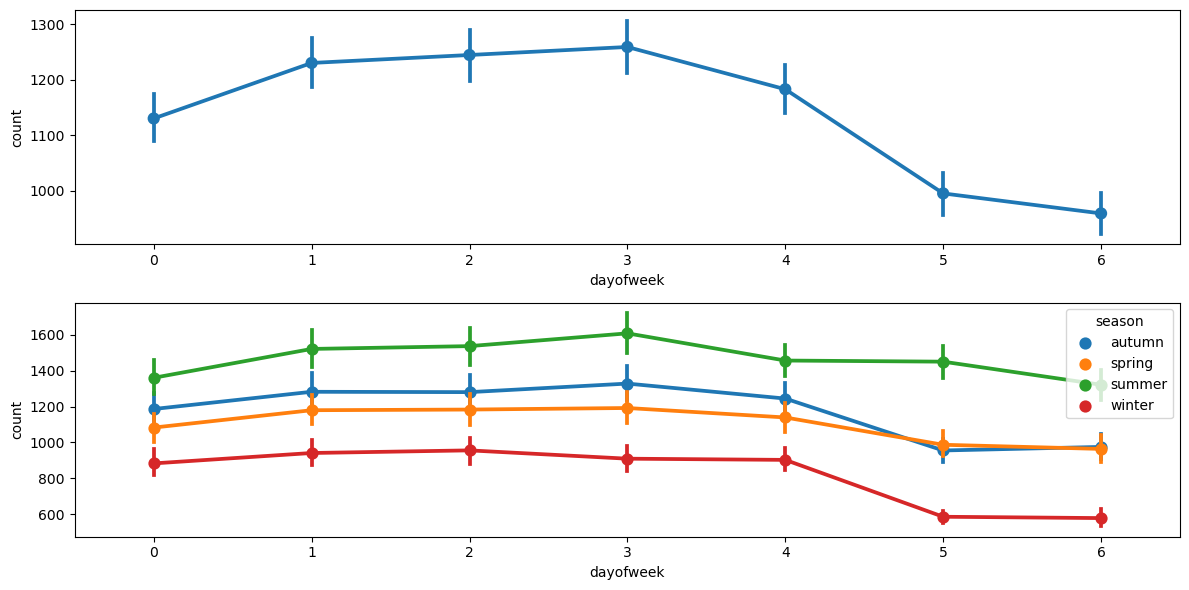

In [30]:
#Set of plots using season
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(12,6), dpi=100)
sns.pointplot(data=bike, x="dayofweek", y="count", ax=axs[0])
sns.pointplot(data=bike, x="dayofweek", y="count", ax=axs[1], hue="season")
plt.tight_layout()

The graph follows the same pattern in each season. That indicated that the bike share increases throughout the week and dropping on the weekends the only difference the the difference in count between season. As people use less bikes in the colder months.

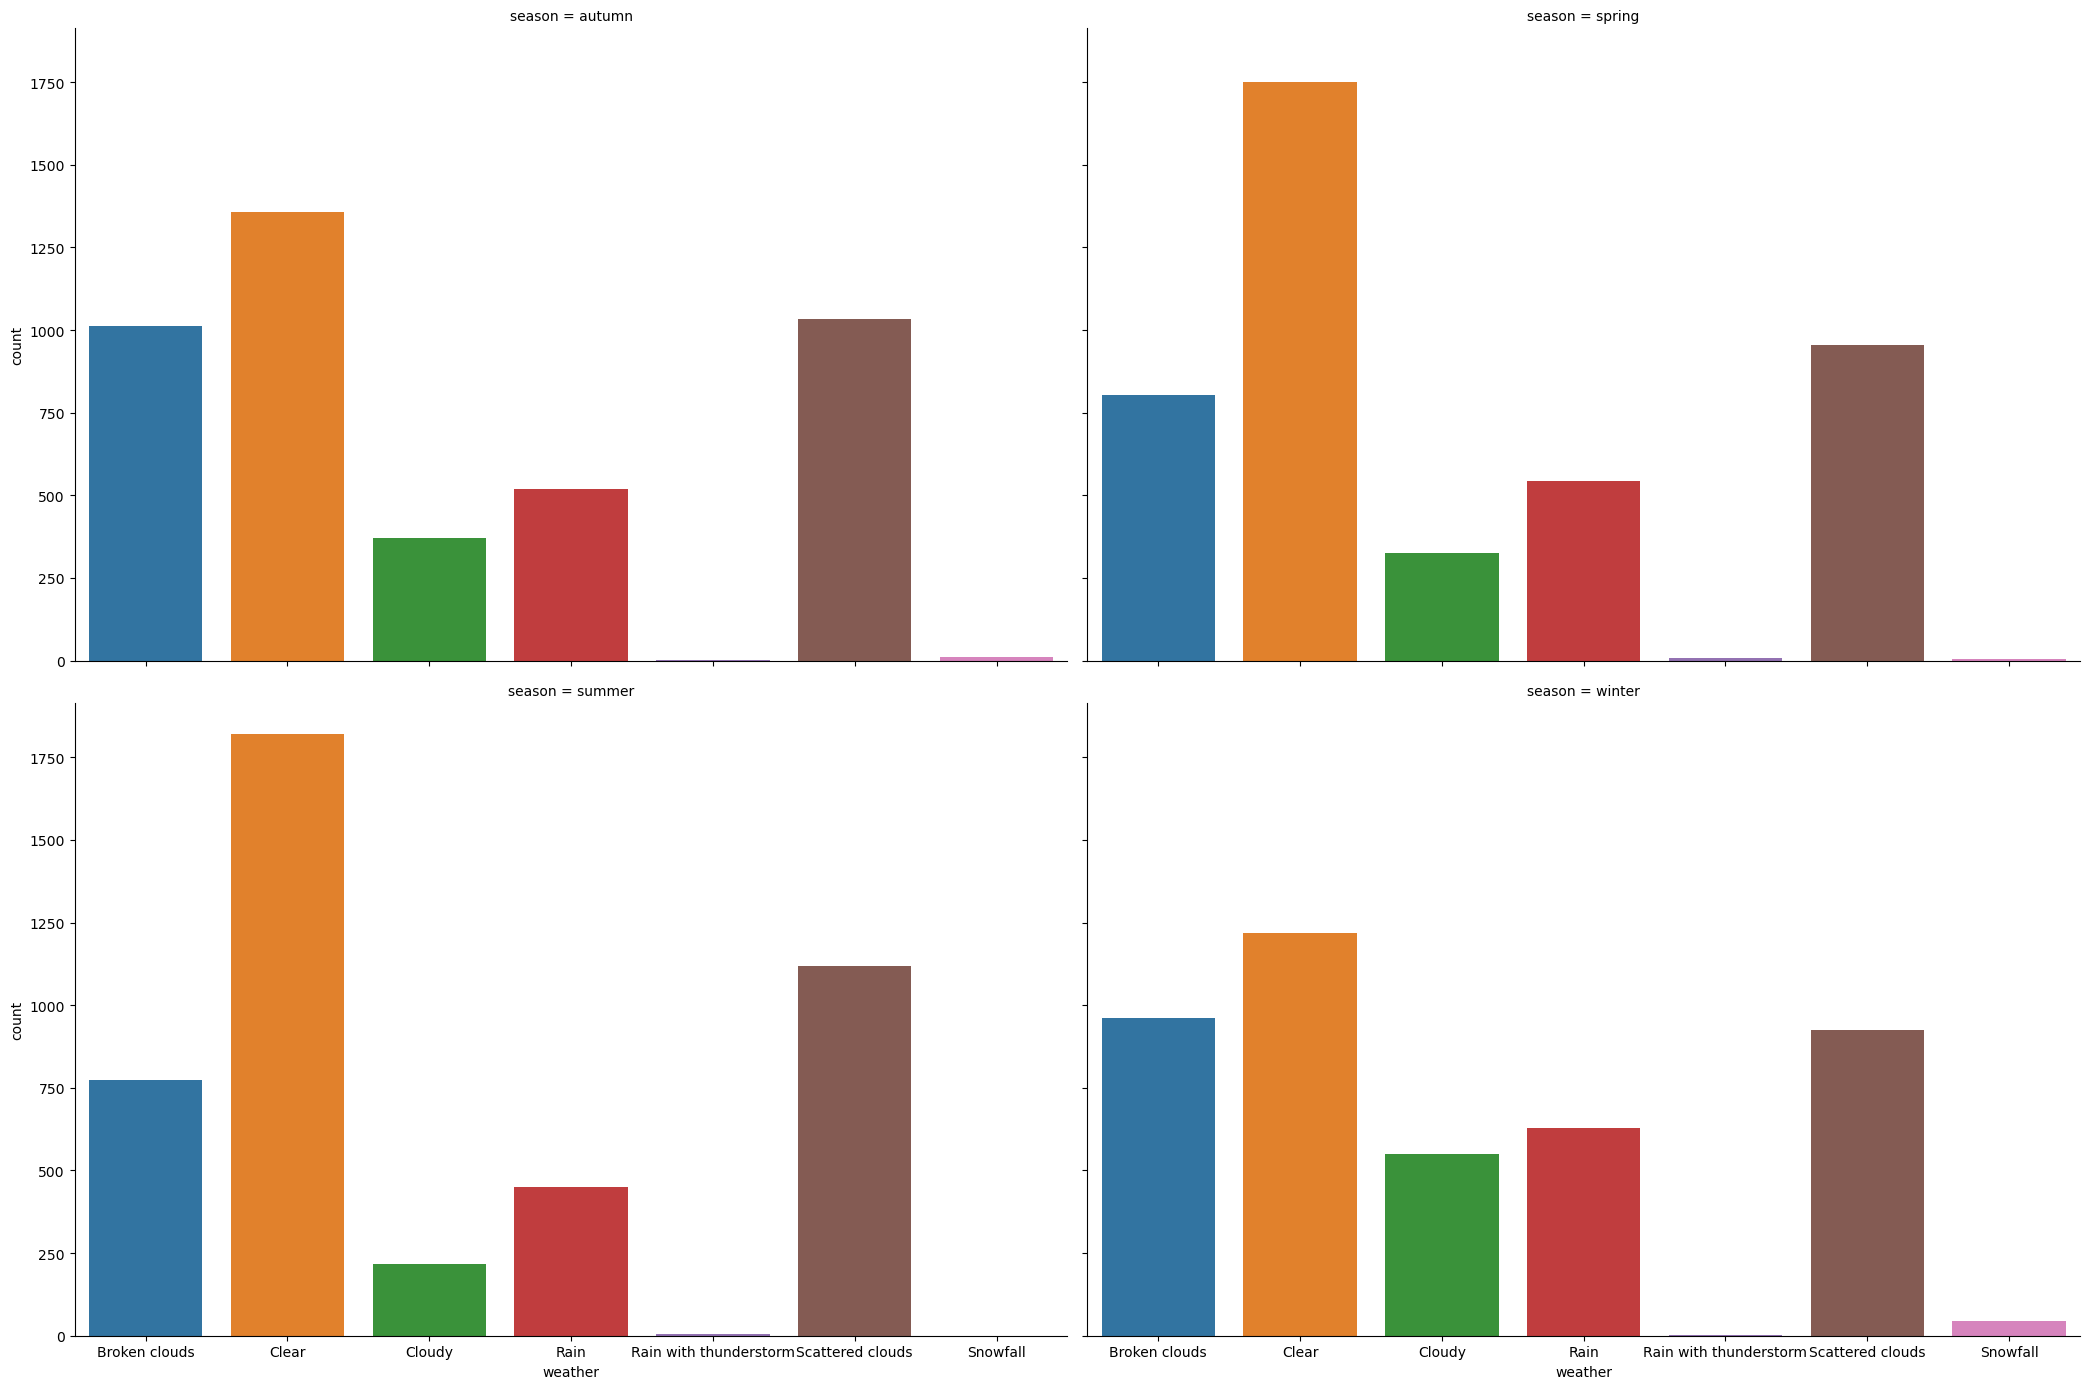

In [77]:
#No of bike Shares by season and weather condition 
sns.catplot(data=bike, x="weather", col="season", kind="count", height=7, aspect=1.5, col_wrap=2)

As expected the count is decreasing in cold and wet weather and increasing in sunny weather.

Bike Share Analysis Report

Introduction:
In this report, we analyze the factors influencing bike share based on a dataset containing information such as temperature, weather conditions, day of the week, and hour of the day. The goal is to understand how these factors affect bike share counts.

Key Findings:

Temperature:
Correlation: There is a strong positive correlation (0.99) between temp_real_C and temp_feels_like_C, indicating that these variables are highly positively correlated, which is expected since they both relate to temperature.
Impact: Higher temperatures are associated with more bike shares, as shown by the moderate positive correlation (0.389) between temp_real_C and count.
Humidity:
Correlation: There is a moderate negative correlation (-0.463) between humidity_percent and count, indicating that higher humidity is associated with fewer bike shares.
Impact: Bike shares decrease as humidity increases, suggesting that comfort levels influence shares decisions.
Day of the Week and Month:
Correlation: There is a weak positive correlation (0.063757) between month and count, suggesting a slight tendency for bike shares to increase with higher month numbers.
There is a weak negative correlation (-0.068688) between dayofweek and count, indicating a slight tendency for bike shares to decrease on later days of the week.
Hourly Usage:
Correlation: There is a weak positive correlation (0.32) between hour and count, indicating that certain hours of the day are associated with higher bike shares counts. 
Usage Patterns: Bike shares peak during rush hours on weekdays, suggesting that people use bikes for commuting.
Weather Conditions:
Weather Impact: Bike shares are higher on clear days, followed by broken clouds or scattered cloudy days. Good weather is associated with increased bike rentals.
Seasonal Trends:
Seasonal Impact: Bike shares increase during summer and decrease during winter, indicating a seasonal pattern in bike usage.
Conclusion:
Overall, this analysis highlights the impact of various factors on bike shares. Temperature, humidity, day of the week, and hour of the day all play a role in determining bike shares counts. 